<p style = "font-family: Arial; font-size:1.75em;color:blue;font-size:bold">
    Exploratory data analysis: Trending YouTube videos from the US and UK 
    <br>
</p>    

[YouTube Dataset link](https://www.kaggle.com/datasnaek/youtube)

### <font color="blue">**Import necssary packages**</font>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# import glob

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)
# pd.set_option("display.latex.repr", False)
# Setup Seaborn
# sns.set_style("whitegrid")
# sns.set_context("poster") # poster

## <font color="blue"> **Dataframe: Load US videos** </font>

In [2]:
us_video_cols = ["video_id","title","channel_title","category_id","tags","views","likes","dislikes","comment_total","thumbnail_link","date"]
df_us_video = pd.read_csv("Data_youtube/USvideos.csv", usecols=us_video_cols, sep=',', low_memory=False)
print("Shape of the dataframe: ", df_us_video.shape)
print()
print("First three rows of the dataframe:\n ", df_us_video.head(3))
print()
print("\nColumn names:\n ", df_us_video.columns)

Shape of the dataframe:  (7998, 11)

First three rows of the dataframe:
        video_id                                                          title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED YOUTUBE FOREVER!   
1  K4wEI5zhHB0                        iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                                    My Response   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   

                                                                                                  tags  \
0  logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|pa...   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|F...   
2                                                                                               [none]   

     views   likes  dislikes  c

## <font color="blue"> Dataframe: Load UK videos

In [3]:
uk_video_cols = ["video_id","title","channel_title","category_id","tags","views","likes","dislikes","comment_total","thumbnail_link","date"]
df_uk_video = pd.read_csv("Data_youtube/GBvideos.csv", usecols=us_video_cols, sep=',', low_memory=False)
print("Shape of the UK video dataframe: ", df_uk_video.shape)
print()
print("First three rows of the UK video dataframe:\n ", df_uk_video.head(3))
print()
print("\nColumn names of UK video dataframe:\n ", df_us_video.columns)

Shape of the UK video dataframe:  (7995, 11)

First three rows of the UK video dataframe:
        video_id  \
0  jt2OHQh0HoQ   
1  AqokkXoa7uE   
2  YPVcg45W0z4   

                                                                                        title  \
0  Live Apple Event - Apple September Event 2017 - iPhone 8, iPhone X, iOS 11 - Apple Keynote   
1                                Holly and Phillip Meet Samantha the Sex Robot | This Morning   
2                                                             My DNA Test Results! I'm WHAT?!   

  channel_title  category_id  \
0   Apple Event           28   
1  This Morning           24   
2  emmablackery           24   

                                                                                                  tags  \
0             apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11   
1  this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat show...   

# <font color="blue"> Data exploration and cleaning: Remove/replace null values, replace/correct values, etc.

In [4]:
print("Number of US unique video_id: ", df_us_video['video_id'].nunique())
print("Number of UK unique video_id: ", df_uk_video['video_id'].nunique())
print("US unique video_id:\n ", df_us_video['video_id'].unique())
print("US unique video_id:\n ", df_uk_video['video_id'].unique())

Number of US unique video_id:  2364
Number of UK unique video_id:  1736
US unique video_id:
  ['XpVt6Z1Gjjo' 'K4wEI5zhHB0' 'cLdxuaxaQwc' ... 'c74FjEqhCsc' 'a5NIg5yyHWo'
 '3VSa-oARk-w']
US unique video_id:
  ['jt2OHQh0HoQ' 'AqokkXoa7uE' 'YPVcg45W0z4' ... 'NRjDqw1w7k8' 'K2SCpgCurVQ'
 'XQFeShp6UIY']


In [5]:
print("Info of US video:\n ")
df_us_video.info()
print()
print("Info of UK video:\n ") 
df_uk_video.info()

Info of US video:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 11 columns):
video_id          7998 non-null object
title             7998 non-null object
channel_title     7998 non-null object
category_id       7998 non-null int64
tags              7998 non-null object
views             7998 non-null int64
likes             7998 non-null int64
dislikes          7998 non-null int64
comment_total     7998 non-null int64
thumbnail_link    7998 non-null object
date              7998 non-null object
dtypes: int64(5), object(6)
memory usage: 687.4+ KB

Info of UK video:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7995 entries, 0 to 7994
Data columns (total 11 columns):
video_id          7995 non-null object
title             7995 non-null object
channel_title     7995 non-null object
category_id       7995 non-null int64
tags              7995 non-null object
views             7995 non-null int64
likes             7995 non-null int64

In [6]:
print("Unique US video dates:\n", df_us_video.date.unique())
print()

print("Unique UK video dates: \n", df_uk_video.date.unique())

Unique US video dates:
 ['13.09' '14.09' '15.09' '16.09' '17.09' '18.09' '19.09' '20.09' '21.09'
 '22.09' '23.09' '24.09' '24.09xcaeyJTx4Co' '25.09' '26.09'
 '26.0903jeumSTSzc' '27.09' '28.09' '29.09' '30.09' '01.10' '02.10'
 '03.10' '04.10' '05.10' '06.10' '07.10' '08.10' '09.10' '100' '10.10'
 '11.10' '12.10' '13.10' '14.10' '15.10' '16.10' '17.10' '18.10' '19.10'
 '20.10' '21.10' '22.10']

Unique UK video dates: 
 ['13.09' '14.09' '15.09' '16.09' '17.09' '18.09' '19.09' '20.09' '21.09'
 '22.09' '23.09' '24.09' '24.09l7yxJDFvTRM' '25.09' '26.09'
 '26.09t2oVUxTV4WA' '27.09' '28.09' '29.09' '30.09' '01.10' '02.10'
 '03.10' '04.10' '05.10' '06.10' '07.10' '08.10' '09.10' '10.10' '11.10'
 '12.10' '13.10' '14.10' '15.10' '16.10' '17.10' '18.10' '19.10' '20.10'
 '21.10' '22.10']


## <font color="blue"> Correct some data format, e.g., "26.0903jeumSTSzc" to '26.03' 

In [7]:
df_us_video.loc[df_us_video.date == '26.0903jeumSTSzc', 'date'] = '26.09'
df_us_video.loc[df_us_video.date == '24.09xcaeyJTx4Co', 'date'] = '24.09'
df_us_video.loc[df_us_video['date'] == '100', 'date'] = '24.09'
df_uk_video.loc[df_uk_video.date == '24.09l7yxJDFvTRM', 'date'] = '24.09'
df_uk_video.loc[df_uk_video['date'] == '26.09t2oVUxTV4WA', 'date'] = '26.09'
# Check that changes are made correctly
print("Corected format: US video dates:\n ", df_us_video.date.unique())
print("Number of unique US video dates: ", df_us_video['date'].nunique())
print("Corected format: UK video dates:\n ", df_us_video.date.unique())
print("Number of unique UK video dates: ", df_uk_video['date'].nunique())

Corected format: US video dates:
  ['13.09' '14.09' '15.09' '16.09' '17.09' '18.09' '19.09' '20.09' '21.09'
 '22.09' '23.09' '24.09' '25.09' '26.09' '27.09' '28.09' '29.09' '30.09'
 '01.10' '02.10' '03.10' '04.10' '05.10' '06.10' '07.10' '08.10' '09.10'
 '10.10' '11.10' '12.10' '13.10' '14.10' '15.10' '16.10' '17.10' '18.10'
 '19.10' '20.10' '21.10' '22.10']
Number of unique US video dates:  40
Corected format: UK video dates:
  ['13.09' '14.09' '15.09' '16.09' '17.09' '18.09' '19.09' '20.09' '21.09'
 '22.09' '23.09' '24.09' '25.09' '26.09' '27.09' '28.09' '29.09' '30.09'
 '01.10' '02.10' '03.10' '04.10' '05.10' '06.10' '07.10' '08.10' '09.10'
 '10.10' '11.10' '12.10' '13.10' '14.10' '15.10' '16.10' '17.10' '18.10'
 '19.10' '20.10' '21.10' '22.10']
Number of unique UK video dates:  40


### Change date format from string '26.03' to datetime 

In [8]:
df_us_video.date = df_us_video['date'].apply(lambda x: pd.to_datetime(str(x).replace('.','')+"2017", format="%d%m%Y") if isinstance(x, str) else df_us_video.date)
df_us_video.date.head(3)

0   2017-09-13
1   2017-09-13
2   2017-09-13
Name: date, dtype: datetime64[ns]

In [9]:
df_uk_video['date'] = df_uk_video.date.apply(lambda x: pd.to_datetime(str(x).replace('.','')+"2017", format='%d%m%Y') if isinstance(x, str) else df_uk_video.date)
df_uk_video.date.head(3)

0   2017-09-13
1   2017-09-13
2   2017-09-13
Name: date, dtype: datetime64[ns]

In [10]:
print("Number of unique video categories in the US: ", df_us_video.category_id.nunique())
print("Number of unique video categories in the UK: ", df_uk_video.category_id.nunique())

print("Unique video categories in the US: ", sorted(df_us_video.category_id.unique()))
print("Unique video categories in the UK: ", sorted(df_uk_video.category_id.unique()))

Number of unique video categories in the US:  16
Number of unique video categories in the UK:  15
Unique video categories in the US:  [1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]
Unique video categories in the UK:  [1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29]


###  There are 40 unique dates beginning from Sep 13, 2017 to Oct 10, 2017

In [11]:
df_us_video.date.nunique(), df_us_video.date.unique()[-5:]

(40, array(['2017-10-18T00:00:00.000000000', '2017-10-19T00:00:00.000000000',
        '2017-10-20T00:00:00.000000000', '2017-10-21T00:00:00.000000000',
        '2017-10-22T00:00:00.000000000'], dtype='datetime64[ns]'))

In [12]:
df_uk_video.date.nunique(), df_uk_video.date.unique()[0:5]

(40, array(['2017-09-13T00:00:00.000000000', '2017-09-14T00:00:00.000000000',
        '2017-09-15T00:00:00.000000000', '2017-09-16T00:00:00.000000000',
        '2017-09-17T00:00:00.000000000'], dtype='datetime64[ns]'))

### Preliminary investigation shows follwoing attributes of US and UK video dataframes: 

|Attributes   | df_us_video | df_uk_video |
|---|---|---| 
|Number of rows | 7998 | 7995 |
|Number of unique videos| 2364 | 1736|
|Number of unique categories| 16 | 15 |
|Number of unique dates| 40 | 40 |

In [13]:
df_us_video.category_id = df_us_video.category_id.astype('str')
df_uk_video.category_id = df_uk_video.category_id.astype('str')

In [14]:
df_us_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 11 columns):
video_id          7998 non-null object
title             7998 non-null object
channel_title     7998 non-null object
category_id       7998 non-null object
tags              7998 non-null object
views             7998 non-null int64
likes             7998 non-null int64
dislikes          7998 non-null int64
comment_total     7998 non-null int64
thumbnail_link    7998 non-null object
date              7998 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 687.4+ KB



### The US videos with zero views


In [15]:
df_us_video[df_us_video.views==0].head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
4500,knhzSEv5Xpk,Katy Perry: Will You Be My Witness?,Katy Perry,1,Katy Perry: Will You Be My Witness|Katy Perry|YouTube Red Original Movie|YouTube Red Originals|Y...,0,0,0,0,https://i.ytimg.com/vi/knhzSEv5Xpk/default.jpg,2017-10-05
4754,knhzSEv5Xpk,Katy Perry: Will You Be My Witness?,Katy Perry,1,Katy Perry: Will You Be My Witness|Katy Perry|YouTube Red Original Movie|YouTube Red Originals|Y...,0,0,0,0,https://i.ytimg.com/vi/knhzSEv5Xpk/default.jpg,2017-10-06
4869,sNSzJiF4sB8,Chance The Rapper - Hurricane Maria Relief Live Stream - directrelief.org,Chance The Rapper,10,chance the rapper|chance tha rapper|chancetherapper|chancerapper|chance|ctr|same drugs|angels|no...,0,0,0,201,https://i.ytimg.com/vi/sNSzJiF4sB8/default.jpg,2017-10-07
4968,knhzSEv5Xpk,Katy Perry: Will You Be My Witness?,Katy Perry,1,Katy Perry: Will You Be My Witness|Katy Perry|YouTube Red Original Movie|YouTube Red Originals|Y...,0,0,0,0,https://i.ytimg.com/vi/knhzSEv5Xpk/default.jpg,2017-10-07
5196,knhzSEv5Xpk,Katy Perry: Will You Be My Witness?,Katy Perry,1,Katy Perry: Will You Be My Witness|Katy Perry|YouTube Red Original Movie|YouTube Red Originals|Y...,0,0,0,0,https://i.ytimg.com/vi/knhzSEv5Xpk/default.jpg,2017-10-08


### Load US and UK "comments" on videos from json files

In [16]:
import json

from pandas.io.json import json_normalize    

# json_normalize('Data_youtube/US_category_id.json')

with open('Data_youtube/US_category_id.json') as data_file:    
     json_object = json.load(data_file)  
        
df = json_normalize(data=json_object, record_path='items', meta=['kind', 'etag', 'id'], 
                     record_prefix='items_', errors='ignore')
df.shape

(32, 7)

In [17]:
df.head(3)

,items_etag,items_id,items_kind,items_snippet,kind,etag,id
0,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""",1,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""",NaN
1,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""",2,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""",NaN
2,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""",10,youtube#videoCategory,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}",youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""",NaN


In [18]:
print("Number of video categories: ", df.items_id.nunique()) 
print("Category numbers:\n ", df.items_id.unique())

Number of video categories:  32
Category numbers:
  ['1' '2' '10' '15' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44']


In [19]:
items_id_series = df.items_id
# items_id_series[0:3]

In [20]:
df.items_snippet[0:3]

0    {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}
1    {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}
2               {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}
Name: items_snippet, dtype: object

In [21]:
# list_title = list(df.items_snippet[0].values())
# list_title[1]

In [22]:
# len(df.items_snippet)

In [23]:
list_title = [list(df.items_snippet[i].values())[1] for i in range(len(df.items_snippet))]
list_title[0:5]

['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports']

### df_category_title: dataframe with category title and category id

In [24]:
df_category_title = pd.DataFrame({'category_id':items_id_series.values, 'Category_title': list_title})
df_category_title.head(6)

,category_id,Category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies


In [25]:
df_category_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
category_id       32 non-null object
Category_title    32 non-null object
dtypes: object(2)
memory usage: 592.0+ bytes


### Merge two dataframes 
    
### df_us_video and df_category_title and get US videos with respective category titles

In [26]:
df_us_video_with_category_title = pd.merge(df_us_video, df_category_title, how='left', on='category_id', copy=False)

In [27]:
df_us_video_with_category_title.head(3)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,Category_title
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED YOUTUBE FOREVER!,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|pa...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,2017-09-13,Entertainment
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|F...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,2017-09-13,Science & Technology
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,2017-09-13,People & Blogs


### Finding: Top 10 US video views are Music and Entertainment 

In [28]:
df_us_video_with_category_title[['video_id', 'title', 'channel_title', 'category_id', 'views', 'likes', 'dislikes', 'date', 'Category_title']].nlargest(n=10, columns=['views'])

,video_id,title,channel_title,category_id,views,likes,dislikes,date,Category_title
1907,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,41500672,2010366,78076,2017-09-22,Music
1694,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,38013692,1950475,75294,2017-09-21,Music
177,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,36323498,1431683,28049,2017-09-13,Music
7141,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,BETNetworks,24,33191594,982842,184310,2017-10-18,Entertainment
6923,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,BETNetworks,24,32512343,968719,180427,2017-10-17,Entertainment
1995,SHq2qrFUlGY,Shakira - Perro Fiel (Official Video) ft. Nicky Jam,shakiraVEVO,10,32136948,578266,43475,2017-09-22,Music
6678,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,BETNetworks,24,31636010,950353,175483,2017-10-16,Entertainment
1440,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,30424471,1762428,63990,2017-09-20,Music
6437,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,BETNetworks,24,30224787,916296,166986,2017-10-15,Entertainment
6210,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,BETNetworks,24,28212358,870122,153018,2017-10-14,Entertainment


In [29]:
# plt.figure(figsize=(8,8))
# df_us_video_with_category_title[['views', 'Category_title']].groupby("Category_title")["views"].sum().plot.pie()
# plt.ylabel("")
# plt.title("Proportions of the US YouTube viewers during Sep. and Oct., 2017" , fontsize=18)
# plt.tight_layout()
# plt.show()

### Merge two dataframes: df_uk_video and df_category_title and obtain UK videos with their category titles 

In [30]:
df_uk_video_with_category_title = pd.merge(df_uk_video, df_category_title, how='left', on='category_id', copy=False)

### Finding: All top 10 UK video views are: Music 

In [31]:
df_uk_video_with_category_title[['video_id', 'title', 'channel_title', 'category_id', 'views', 'likes', 'dislikes', 'date', 'Category_title']].nlargest(n=10, columns=['views'])

,video_id,title,channel_title,category_id,views,likes,dislikes,date,Category_title
2768,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,58961407,2289911,96258,2017-09-26,Music
2573,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,55269274,2241616,92413,2017-09-25,Music
2359,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,51093264,2184109,88300,2017-09-24,Music
2143,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,47496553,2129373,85273,2017-09-23,Music
592,QeaumjX9DNY,Yandel - Como Antes (Official Video) ft. Wisin,YandelVEVO,10,42486342,678389,13995,2017-09-15,Music
572,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,41959549,1502097,30036,2017-09-15,Music
1847,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,41500671,2010229,78065,2017-09-22,Music
347,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,38678096,1458937,28784,2017-09-14,Music
2189,SHq2qrFUlGY,Shakira - Perro Fiel (Official Video) ft. Nicky Jam,shakiraVEVO,10,38144440,624008,47220,2017-09-23,Music
1649,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,37982279,1950226,75273,2017-09-21,Music


In [32]:
df_uk_video_with_category_title[['video_id', 'title', 'channel_title', 'category_id', 'views', 'likes', 'dislikes', 'date', 'Category_title']].nlargest(n=10, columns=['likes'])

,video_id,title,channel_title,category_id,views,likes,dislikes,date,Category_title
2768,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,58961407,2289911,96258,2017-09-26,Music
2573,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,55269274,2241616,92413,2017-09-25,Music
2359,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,51093264,2184109,88300,2017-09-24,Music
2143,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,47496553,2129373,85273,2017-09-23,Music
1847,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,41500671,2010229,78065,2017-09-22,Music
1649,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,37982279,1950226,75273,2017-09-21,Music
1411,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,30424471,1762154,63962,2017-09-20,Music
572,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,41959549,1502097,30036,2017-09-15,Music
1201,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,20565649,1477400,46419,2017-09-19,Music
347,tt2k8PGm-TI,ZAYN - Dusk Till Dawn ft. Sia,ZaynVEVO,10,38678096,1458937,28784,2017-09-14,Music


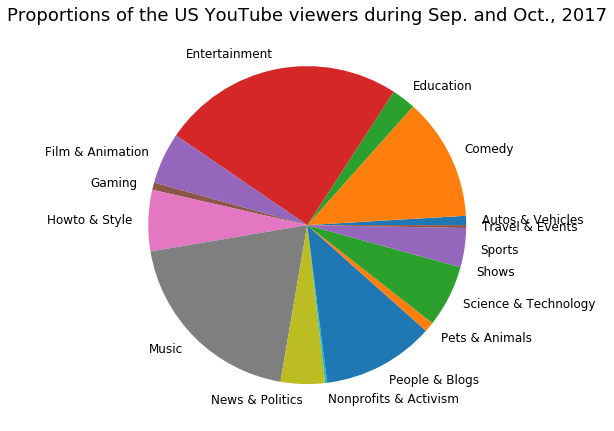

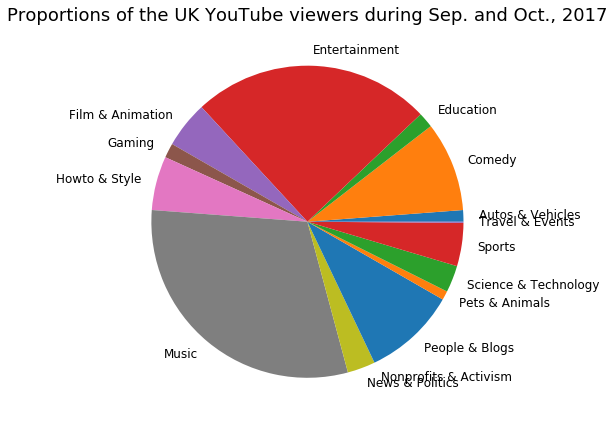

In [71]:
plt.figure(figsize=(8,8))
df_us_video_with_category_title[['views', 'Category_title']].groupby("Category_title")["views"].sum().plot.pie()
plt.ylabel("")
plt.title("Proportions of the US YouTube viewers during Sep. and Oct., 2017" , fontsize=18)
plt.tight_layout()
plt.savefig("pie_chart_US.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,8))
df_uk_video_with_category_title[['views', 'Category_title']].groupby("Category_title")["views"].sum().plot.pie()
plt.ylabel("")
plt.title("Proportions of the UK YouTube viewers during Sep. and Oct., 2017" , fontsize=18)
plt.tight_layout()
plt.savefig("pie_chart_UK.png", bbox_inches="tight")
plt.show()



* Music, Entertainment, and Comedy are the most viewed video categories in both US and UK. 

### Finding: Comparison of Distribution of US and UK Youtube views 

### Distributions of views in the UK and US are found highty skewed.  

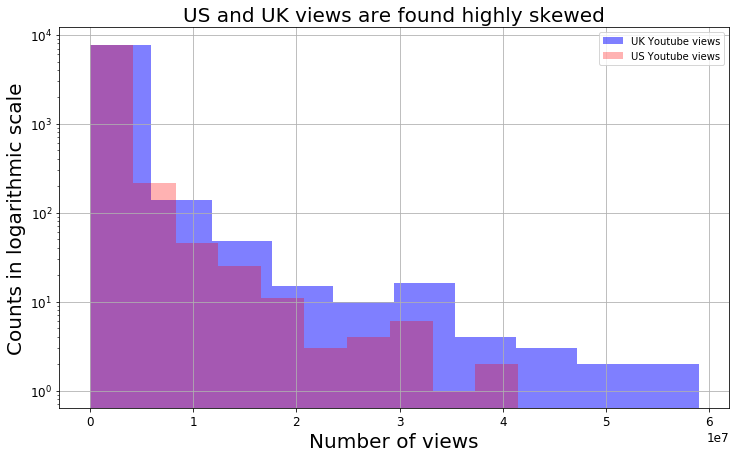

In [72]:
plt.figure(figsize=(12,7))
plt.hist(df_uk_video_with_category_title.views + 1, log=True, color="blue", alpha=0.5, label="UK Youtube views")
plt.hist(df_us_video_with_category_title.views + 1, log=True, color="red", alpha=0.3, label="US Youtube views")
plt.title("US and UK views are found highly skewed", fontsize=20)
plt.xlabel("Number of views", fontsize=20)
plt.ylabel("Counts in logarithmic scale", fontsize=20)
plt.grid(True)
plt.legend()
plt.savefig("Distribution_US_UK.png", bbox_inches="tight")
plt.show()

In [35]:
print("Basic statistics of the US YouTube views: \n")
print(df_us_video_with_category_title.views.describe())

print("\nBasic statistics of the UK YouTube views: \n")
print(df_uk_video_with_category_title.views.describe())

Basic statistics of the US YouTube views: 

count    7.998000e+03
mean     9.391016e+05
std      2.147691e+06
min      0.000000e+00
25%      9.690000e+04
50%      3.086115e+05
75%      9.595132e+05
max      4.150067e+07
Name: views, dtype: float64

Basic statistics of the UK YouTube views: 

count    7.995000e+03
mean     1.110467e+06
std      3.048405e+06
min      0.000000e+00
25%      1.082980e+05
50%      3.150910e+05
75%      9.710280e+05
max      5.896141e+07
Name: views, dtype: float64


* We observe that distributions of both US and UK views are right-skewed. 
* Few YouTube videos are virul with extermley high number of views.
* The mean number of views in the US is 939,102; while the mean number of views in the UK is 1,110,467.
* As there are some extreme number of views, standard deviation of both distribuitions are very high.
* The standard deviation of the US views is 2,147,691, which 2.3 times larger than its mean.

### Finding: Views versus likes according to video categories

In [36]:
df_us_video_with_category_title.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date',
       'Category_title'],
      dtype='object')

In [37]:
from ggplot import *

C:\Users\elias\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

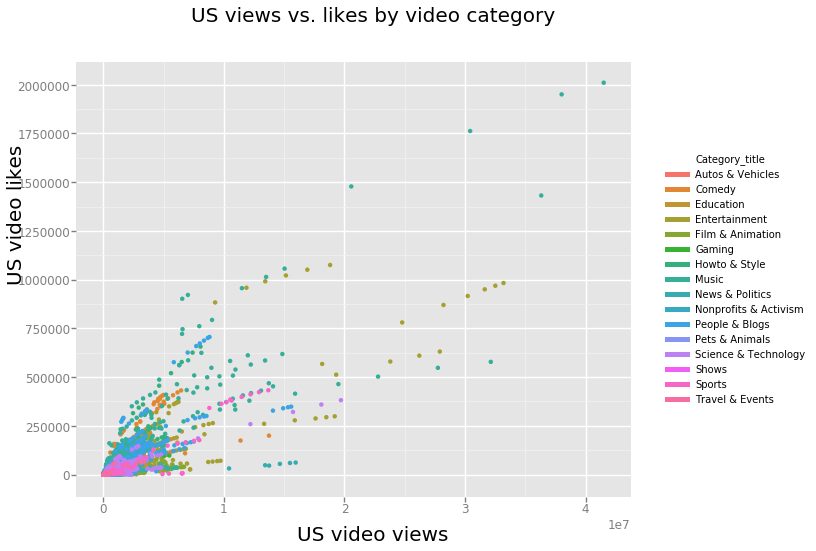

<ggplot: (-9223371869355514389)>

In [77]:
ggplot(aes(x='views', y='likes', color="Category_title"), data=df_us_video_with_category_title) + \
    geom_point(alpha=1.0) + \
    ggtitle(element_text(text="US views vs. likes by video category", size=20)) + \
    xlab(element_text(text="US video views",size=20)) + \
    ylab(element_text(text="US video likes", size=20))
# ggsave("Corr_.png")
# dev.off
# plt.savefig("Corr_combined.png", bbox_inches="tight")
#     scale_color_brewer(type='qual')

* Above scatter plot shws the realtionship between number of views and number of likes by video categories.
* These two variables are highly correlated - videos with more number of views have higher number of likes

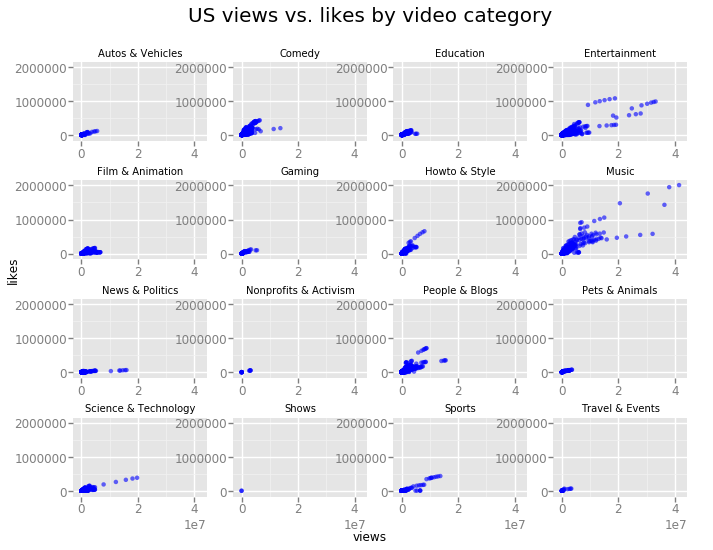

<ggplot: (-9223371869357129335)>

In [39]:
plt.figure(figsize=(25,20))
ggplot(aes(x='views', y='likes'), data=df_us_video_with_category_title) + \
    geom_point(alpha=0.6, color='blue') + \
    ggtitle(element_text(text="US views vs. likes by video category", size=20)) + \
    facet_wrap("Category_title") 


* Above figure shows individual category-wise relationship between number of views and number of likes.
* We observe that music and entertainment have the highest number of views and likes.

### Finding: Correlation heatmap among US views, likes, dislikes, and total comments

In [40]:
us_corr = df_us_video_with_category_title[['views', 'likes', 'dislikes', 'comment_total']].corr()

In [41]:
print("\nCorrelation coeffecients amnong number of views, likes, dislikes, and comments are: \n")
print(us_corr)


Correlation coeffecients amnong number of views, likes, dislikes, and comments are: 

                  views     likes  dislikes  comment_total
views          1.000000  0.832854  0.541900       0.715559
likes          0.832854  1.000000  0.497287       0.836366
dislikes       0.541900  0.497287  1.000000       0.543974
comment_total  0.715559  0.836366  0.543974       1.000000


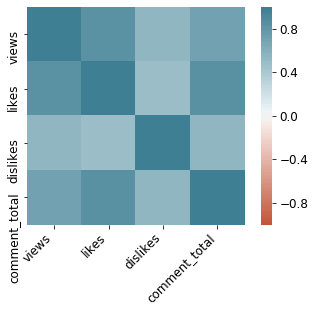

In [78]:
# sns.heatmap(us_corr)
ax = sns.heatmap(
    us_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.savefig("Corr_box.png", bbox_inches="tight")
plt.show()

* Correlation coefficient between number of likes and number of views is 0.83
* Correlation coefficient between number of dislikes and number of views is 0.54
* Correlation coefficient between number of comments and number of views is 0.72

# Groupby date

### Finding: US and UK video views per day

In [43]:
vid_check = df_us_video_with_category_title[['video_id', 'date']].groupby('date').count()
# vid_check.plot(kind="bar")
# vid_check.columns = ['Dates', 'Videos per date']

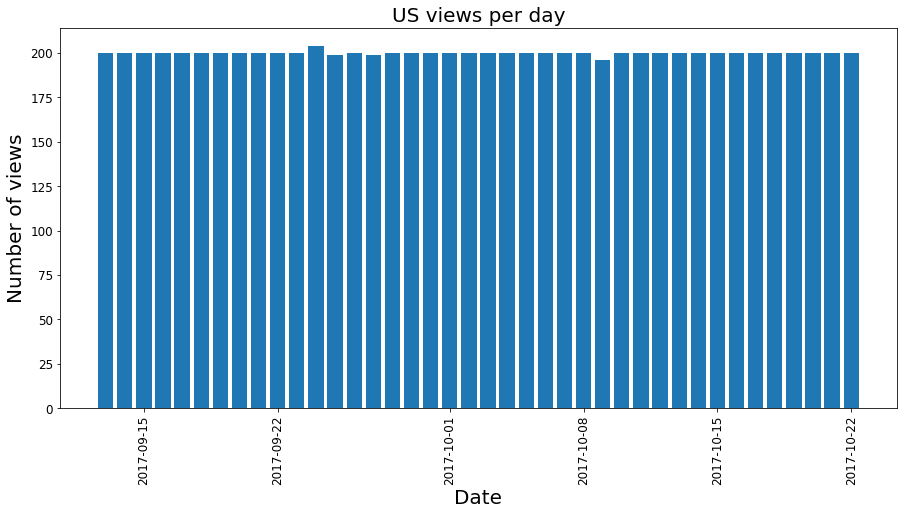

In [79]:
plt.figure(figsize=(15,7))
plt.bar(x=vid_check.index, height=vid_check.video_id)
plt.xticks(rotation = 90)
plt.title("US views per day", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Number of views", fontsize=20)
plt.savefig("views_per_day.png", bbox_inches="tight")
plt.show()

* The dataset contains records for 40 days from September 13, 2017 to October 10, 2017.
* Above bargraph shows per number of views of all videos.
* The number of views per day is mostly 200.

In [45]:
vid_check.head(n=5)

,video_id
date,
2017-09-13,200
2017-09-14,200
2017-09-15,200
2017-09-16,200
2017-09-17,200


### Finding: Trending US views

In [46]:
from datetime import datetime
sept_13_id = df_us_video_with_category_title.loc[df_us_video_with_category_title['date'] == datetime(2017,9,13), 'video_id'].tolist()
sept_13 = df_us_video_with_category_title.loc[df_us_video_with_category_title['video_id'].isin(sept_13_id), ['video_id', 'date']]
sept_13_count = sept_13.groupby('date', as_index=False).count() 

In [47]:
sept_13_count

,date,video_id
0,2017-09-13,200
1,2017-09-14,151
2,2017-09-15,84
3,2017-09-16,38
4,2017-09-17,25
5,2017-09-18,14
6,2017-09-19,4


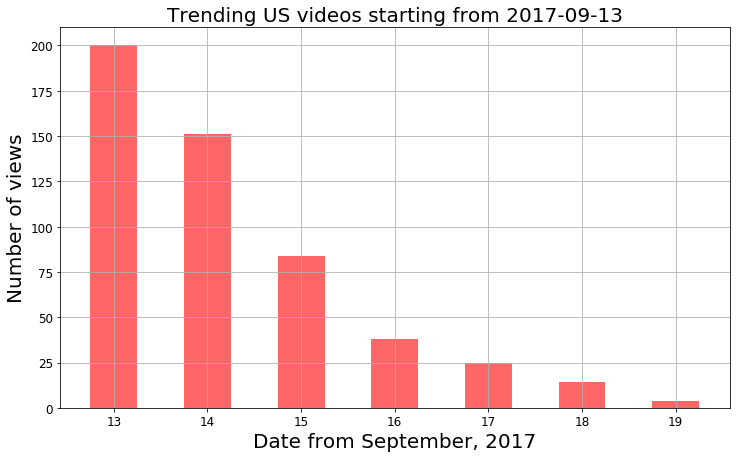

In [80]:
plt.figure(figsize=(12,7))
plt.bar(x=sept_13_count.date.dt.day, height=sept_13_count.video_id, width=0.5, color="red", alpha=0.6)
plt.xlabel("Date from September, 2017", fontsize=20)
plt.ylabel("Number of views", fontsize=20)
plt.title("Trending US videos starting from 2017-09-13", fontsize=20)
plt.grid(True)
plt.savefig("Trend_video.png", bbox_inches="tight")
plt.show()

* Trending number of videos that starts high at Sep. 13, 2017 declines rapidly by Sep. 19, 2019. 

In [49]:
grpby_us_category_id = df_us_video.groupby('category_id')
grpby_uk_category_id = df_uk_video.groupby('category_id')

# US video cateory wise total views, likes, and dislikes

df_us_video_category_wise_views = grpby_us_category_id[['views', 'likes', 'dislikes']].agg('sum')
df_us_video_category_wise_views.reset_index(inplace=True)

# UK video cateory wise total views, likes, and dislikes

df_uk_video_category_wise_views = grpby_uk_category_id[['views', 'likes', 'dislikes']].agg('sum')
df_uk_video_category_wise_views.reset_index(inplace=True)

In [50]:
df_us_video_category_wise_views.rename(columns={'views':'US_views', 'likes':'US_likes', 'dislikes':'US_dislikes'},
                                      inplace=True)
df_us_video_category_wise_views.head(3)

,category_id,US_views,US_likes,US_dislikes
0,1,392920664,8721068,434484
1,10,1475992648,76110117,2763057
2,15,75562909,1883089,33880


In [51]:
df_uk_video_category_wise_views.rename(columns={'views':'UK_views', 'likes':'UK_likes', 'dislikes':'UK_dislikes'},
                                      inplace=True)
df_uk_video_category_wise_views.head(3)

,category_id,UK_views,UK_likes,UK_dislikes
0,1,429410126,8423787,392398
1,10,2696998135,114764546,3794279
2,15,82402075,1894583,36007


In [52]:
df_us_video_category_wise_views.category_id = df_us_video_category_wise_views.category_id.astype('str', inplace=True)
df_uk_video_category_wise_views.category_id = df_uk_video_category_wise_views.category_id.astype('str', inplace=True)

In [53]:
df_us_video_category = pd.merge(df_us_video, df_category_title, how='outer',  on='category_id', sort=False)

In [54]:
df_us_category_views = pd.merge(df_us_video_category_wise_views, df_category_title, left_on='category_id', right_on='category_id')
df_uk_category_views = pd.merge(df_uk_video_category_wise_views, df_category_title, left_on='category_id', right_on='category_id')

In [55]:
# df_us_category_views.head()

In [56]:
# df_uk_category_views.head()

 <font color="green"> US youtube videos: Category-wise total views, likes and dislikes 

### Finding: Category-wise top 5 US views are: 
    - Entertainment
    - Music
    - Comedy
    - People \& Blogs
    - Sicence \& Technology

In [57]:
df_us_category_views.nlargest(n=5,columns='US_views')

,category_id,US_views,US_likes,US_dislikes,Category_title
9,24,1848944372,55261042,3551122,Entertainment
1,10,1475992648,76110117,2763057,Music
8,23,936255337,43528592,1432895,Comedy
7,22,856891892,34603439,3243878,People & Blogs
13,28,473462041,11725258,869399,Science & Technology


<font color="blue"> Category wise total US views, likes and dislikes

In [58]:
# df_us_category_views.plot(x='Category_title', y = ['US_views', 'US_likes', 'US_dislikes'], kind='bar', figsize=(15,5))
# plt.yscale('log')
# plt.ylabel('Views, likes, dislikes of US videos (log scale)', fontsize=15)
# plt.title('US video: Category-wise number of views, likes, and dislikes', fontsize=15)
# plt.show()

## <font color="green"> UK youtube videos: Category-wise total views, likes and dislikes

<font color='blue'> Finding: Category-wise top total UK views are: 
    - Music 
    - Entertainment
    - People \& Blogs 
    - Comedy
    - Howto \& Style

In [59]:
df_uk_category_views.nlargest(n=5, columns= 'UK_views')

,category_id,UK_views,UK_likes,UK_dislikes,Category_title
1,10,2696998135,114764546,3794279,Music
9,24,2200309690,62058823,3921046,Entertainment
7,22,854759844,32498406,1182245,People & Blogs
8,23,825336116,37603824,990192,Comedy
11,26,495865492,25088855,626590,Howto & Style


In [60]:
# df_uk_category_views.plot(x='Category_title', y = ['UK_views', 'UK_likes', 'UK_dislikes'], kind='bar', figsize=(15,5))
# plt.yscale('log')
# plt.ylabel('Views, likes, dislikes of UK videos (log scale)', fontsize=15)
# plt.title('UK video: Category-wise number of views, likes, and dislikes', fontsize=15)
# plt.show()

### Finding: Comparison of US and UK videos: Category-wise total views 

### Merge US and UK video views 

In [61]:
df_US_UK_views_cmp = pd.merge(df_us_category_views, df_uk_category_views, on='Category_title') 

In [62]:
df_US_UK_views_cmp.head(3)

,category_id_x,US_views,US_likes,US_dislikes,Category_title,category_id_y,UK_views,UK_likes,UK_dislikes
0,1,392920664,8721068,434484,Film & Animation,1,429410126,8423787,392398
1,10,1475992648,76110117,2763057,Music,10,2696998135,114764546,3794279
2,15,75562909,1883089,33880,Pets & Animals,15,82402075,1894583,36007


### Finding: We find that UK views of 'Music' and 'Entertainment' are higher than US views
### But US views of 'News & Politics' and 'Science & Technology' are higher than UK views

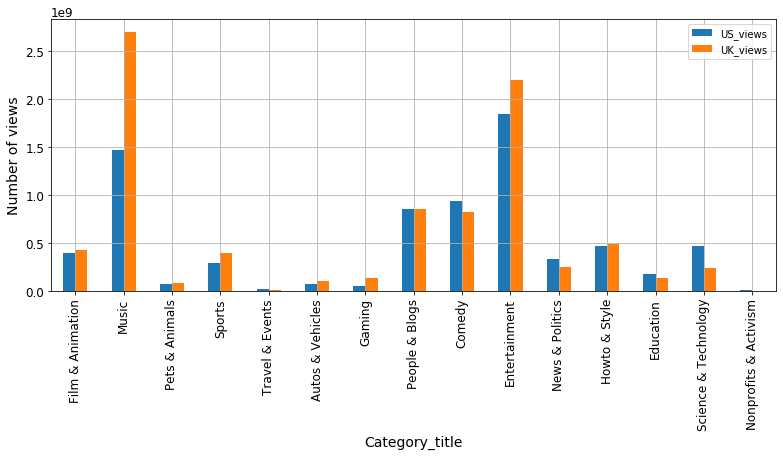

In [81]:
df_US_UK_views_cmp.plot(x="Category_title", y=["US_views", "UK_views"], kind='bar',figsize=(13,5))
# plt.yscale('log')
plt.ylabel("Number of views")
plt.grid(True)
plt.savefig("comp_views.png", bbox_inches="tight")
plt.show()

### Comparison of US and UK 'likes' and 'dislikes'

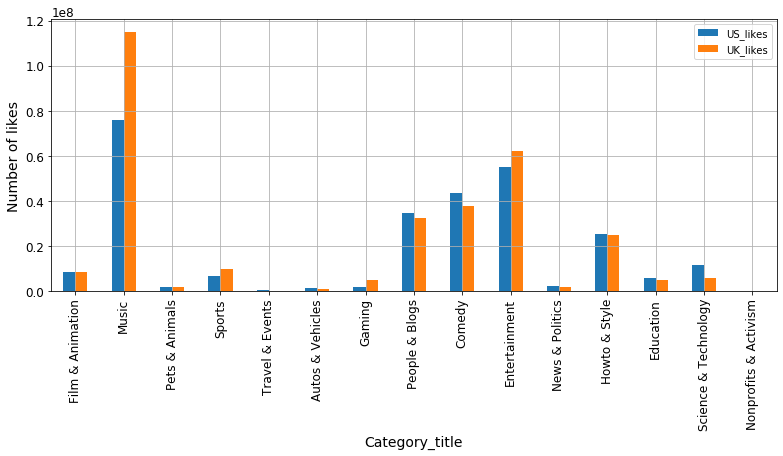

In [82]:
df_US_UK_views_cmp.plot(x="Category_title", y=["US_likes", "UK_likes"], kind="bar", figsize=(13,5))
# plt.yscale('log')
plt.ylabel("Number of likes")
plt.grid(True)
plt.savefig("likes_comp.png", bbox_inches="tight")
plt.show()

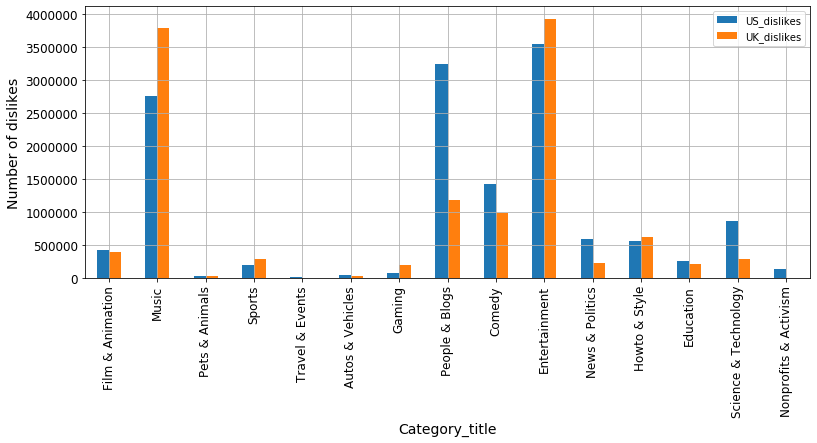

In [83]:
df_US_UK_views_cmp.plot(x="Category_title", y=["US_dislikes", "UK_dislikes"], kind="bar", figsize=(13,5))
# plt.yscale('log')
plt.ylabel("Number of dislikes")
plt.grid(True)
plt.savefig("dislikes.png", bbox_inches="tight")
plt.show()

In [66]:
# df_us_video_with_category_title.to_csv('df_us_video.csv', index=False)